<a href="https://colab.research.google.com/github/JuanZapa7a/Medical-Image-Processing/blob/main/NB3-01%20Fundamentals%20of%20Digital%20Images%20and%20Computer%20Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 3-1: Fundamentals of Digital Images and Computer Vision

## 0.- Initialize filesystem and libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import Image, display

## 1.- Human Visual Perception

Human visual perception is the process that allows us to **capture, interpret, and understand** the world through the sense of sight.

* The **eye** captures visual information from the environment, detecting **brightness and hues**. It **converts** these into **electrical signals** through the retina.

* The **brain's visual processing centers** **analyze** the signals from the eye to reconstruct the visual scene, (shapes, spatial arrangements, depth), **recognize** objects, and **understand** the scene using prior knowledge.

### 1.1. Structure of the Human Eye

The visual system **captures light** through the eye, **focusing** it **on the retina**, where photoreceptor cells **convert** it into **neural signals**. The eye is composed of three main parts:

* The **outer covering** includes the transparent **cornea**, which covers the front of the eye, and the opaque **sclera**, which encloses the rest of the eyeball.

* The intermediate layer is formed by the **choroid**, located between the sclera and the retina, contains blood vessels that supply the eye with oxygen and nutrients.

	It also includes the **iris**, which controls the amount of light entering the eye by adjusting the **pupil** size, and the **ciliary body**, which adjusts the lens shape for focusing.

* The **retina** is the innermost layer, where light is focused and detected by two types of photoreceptors: **cones** (responsible for color vision and sharp detail in bright light) and **rods** (specialized in low-light vision and motion detection, providing peripheral vision but without color sensitivity).

	The retina's **fovea**, located in the center of the macula, is the point of sharpest vision, responsible for detailed central vision. The **macula**, surrounding the fovea, allows to see fine details and colors clearly.

	Signals from the retina are transmitted to the **brain** via the **optic nerve**, where they are processed to create a visual image.


<img src="https://d2jx2rerrg6sh3.cloudfront.net/image-handler/ts/20180924102214/ri/673/picture/2018/9/shutterstock_292987178.jpg" alt="" width="400">
<p style="text-align: center;">
Figure 1: Parts of the human eye. Source:
<a href="https://www.news-medical.net/health/Anatomy-of-the-Human-Eye.aspx">News-Medical</a>
</p>

## 2.- Digital Images

A **digital image** is a 2D representation of the visible light spectrum, capturing the intensity of light reflected or emitted from objects.

This captured light is transformed, usually using CCD (Charge-Coupled Device) or CMOS (Complementary Metal-Oxide-Semiconductor) sensors, into an **array of values** that form the image on a digital screen.

However, **medical images are generated in a different way**, depending on the imaging modality.

The **understanding** of the image corresponds to **image processing algorithms**, which preprocess the image, enhance it, and detect objects of interest, their boundaries, and attributes.

### 2.1. Sampling and Quantization

To understand **digital images**, two key concepts are involved in transforming a **continuous image function** $f(s, t)$, where $s$ and $t$ are continuous variables, into a **digital format**, represented by a **two-dimensional array of discrete values**: **sampling** and **quantization**.

#### **Sampling**

Sampling is the process of **converting a continuous signal** (such as a continuous image) **into a discrete signal**. In the context of digital images, sampling refers to **selecting a finite number of points** from the continuous image function $f(s, t)$.
  
This results in a **grid of discrete points**, $f(x, y)$, where $x$ and $y$ are integers representing the **sampled coordinates**.
  
The **spatial resolution** of the digital image refers to the smallest discernible detail that can be distinguished within the image and **depends on the sampling rate**.
  
Spatial resolution is often quantified in terms of **Points per Inch (PPI)**, which refers to the pixel density of a digital display. It measures how many pixels are displayed per inch on a screen (linear density).

The **higher the spatial resolution**, the **finer the details** that can be resolved in the image (and the more detail captured from the continuous image).
  
In medical imaging, spatial resolution may also be referred in terms of **line pairs per millimeter (lp/mm)**, which measures the ability to distinguish between closely spaced lines in an image.

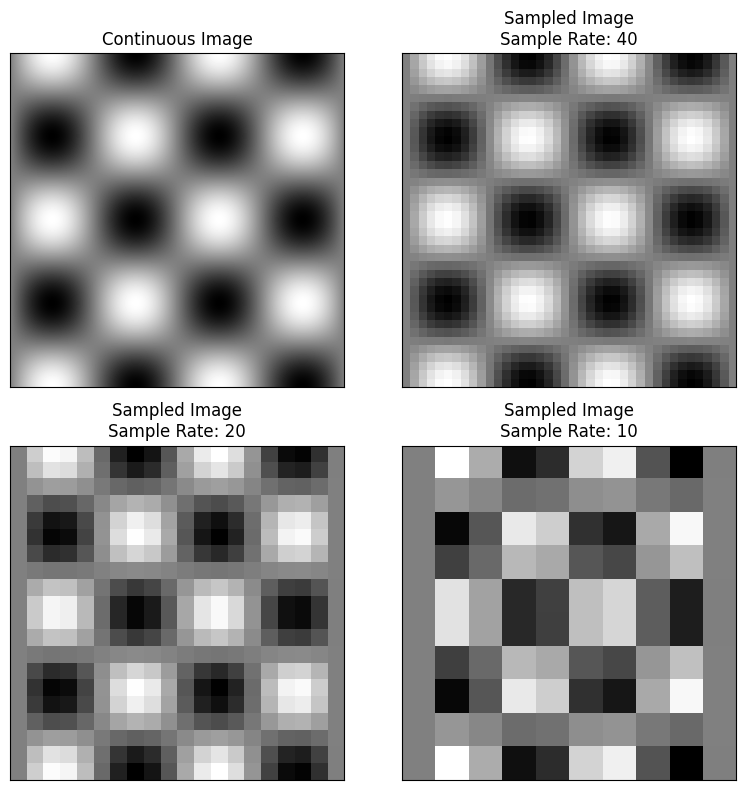

Figure 2: Continuous image and three sampled images with different sample rates.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/Sampling_rate.png'
display(Image(filename=image_path, width=600))
caption = '<p style="text-align: left;">Figure 2: Continuous image and three sampled images with different sample rates.</p>'
display({'text/html': caption}, raw=True)

#### **Quantization**

Quantization is the process of **converting the continuous amplitude values** of the sampled image **into a finite set of discrete levels (bit-depth)**, represented using a **fixed number of bits**.
  
After sampling, each point $f(x, y)$ still holds a **continuous range** of intensity values. Quantization maps these continuous intensity values to a **limited number of discrete intensity levels**.
  
For example, in an 8-bit image, the intensity values are quantized to $2^8=256$ discrete levels ranging from 0 to 255 (**grayscale image**). If only 1 bit is used to represent the intensity levels, then the image is said to be **binarized** (black & white).
  
**Medical images** usually require a **higher bit-depth** to be able to represent data with high accuracy. Usual values are 16 bits (range from 0 to $2^{16}-1=65535$) or even higher.

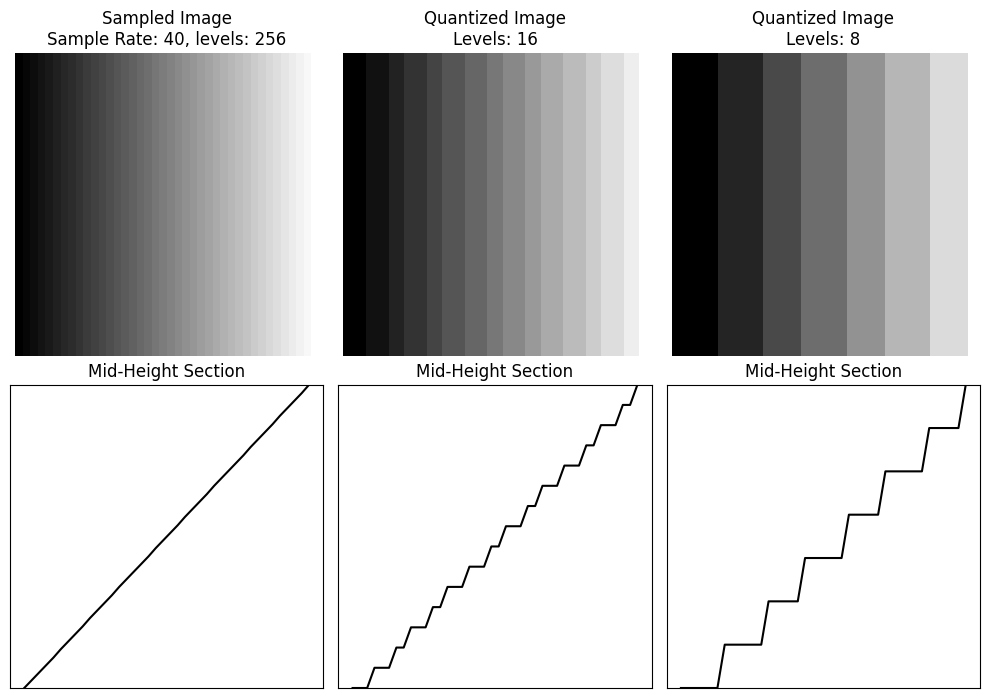

Figure 3: Effect of the quantized levels on grayscale intensities.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/Quantization.png'
display(Image(filename=image_path, width=800))
caption = '<p style="text-align: left;">Figure 3: Effect of the quantized levels on grayscale intensities.</p>'
display({'text/html': caption}, raw=True)

### 2.2. Coordinates of Grayscale Images

The digital image resulting after sampling and quantizing can be represented as a **two-dimensional function**, $f(x,y)$, where $(x,y)$ represent discrete values for the **spatial coordinates**.

The finite and discrete value of $f$ at any given point $(x,y)$ represents the **brightness**, **intensity** or **gray level** of the image at that specific location.

* $x = 0, 1, 2, \ldots, M-1$, where $M$ is the height of the image (number of rows),
* $y = 0, 1, 2, \ldots N-1$, where $N$ is the width of the image (number of columns),
* $f(x,y) = 0, 1, 2, \ldots L-1$,  where $L$ denotes the maximum brightness or intensity of each coordinate (i.e., $L = 256$ for an 8-bit image).

Digital images are considered matrices, and so, they follow the matrix notation rather than the Cartesian coordinate system:

* $x$ increases downwards the image,
* $y$ increases rightwards,
* the **origin of the coordinate system** $(0,0)$ is located at the top left corner of the image,
* the bottom right pixel corresponds to $(M-1, N-1)$.

$$\displaystyle
f(x,y) =
\begin{bmatrix}
f(0,0) & f(0,1) & \cdots & f(0,N-1) \\
f(1,0) & f(1,1) & \cdots & f(1,N-1) \\
\vdots & \vdots & \ddots & \vdots \\
f(M-1,0) & f(M-1,1) & \cdots & f(M-1,N-1)
\end{bmatrix}
$$

### 2.3. Pixels and Voxels

**Pixels**

A **pixel** (_picture element_) in an image represents a **point at coordinates** $(x,y)$ that has assigned a **value** $f(x,y)$ for grayscale images (or a tupla for color images).

Each pixel corresponds to a specific **distance in the real world** (measured in $\mu m$ or $mm$).

The smaller the **size** of the sensors, the higher the **resolution** (there are more sensors per unit area to sample the image) and the lower the **sensitivity**, especially in low-light (a smaller sensor captures less light than a bigger one). Usually pixels have all of them a uniform sensor size.

In **medical imaging**, the **pixel size** depends on the different **modalities** (which uses different detectors): **the more sensitive** the detector is, **the higher** the resolution and **the smaller** the pixel size.


**Voxels**

A **voxel** is the equivalent of a pixel in a 3D volume (_volume element_).

Most standard medical image formats, such as DICOM, or NIfTI, **store voxel size information** in their header, which enables precise analysis and visualization.








#### **Pixel and voxel conectivity**

Pixel and voxel connectivy refers to which **neighborhood** is considered for a specific pixel or voxel in image processing algorithms.

In operations like **convolution**, a mask or kernel is placed on top of an image pixel, and the ﬁnal value of the output image pixel is determined using a combination of the value in the mask and the pixel value in the image.

Pixel/voxel neighborhood can be:

* **4-connected:** when only the pixels up, down, left and right of the central pixel are considered.

* **8-connected:** includes not only the four directly adjacent pixels but also the four diagonal pixels. This is more common that 4-connected neighbourhood.

* **26-connected:** if voxels are considered, then the 4- and 8-connected neighborhoods of a pixel correspond to 6 and 26 connectivities in 3D space.

<img src="https://upload.wikimedia.org/wikipedia/commons/0/09/Neighbourhood_definition.png" alt="" width="500">
<p style="text-align: center;">
Figure 4: 4- and 8-neighborhood of a pixel. Source:
<a href="https://radiologykey.com/pet-imaging-in-multiple-sclerosis-focus-on-the-translocator-protein/">Wikimedia Commons</a>
</p>

<img src="https://www.researchgate.net/publication/352405119/figure/fig5/AS:11431281212337225@1702589858170/Voxels-neighbours-numbering-The-numeration-is-organised-by-levels-in-the-Z-dimension.tif" alt="" width="500">
<p style="text-align: center;">
Figure 5: 26 neighborhood of a voxel. Source:
<a href="https://www.researchgate.net/figure/Voxels-neighbours-numbering-The-numeration-is-organised-by-levels-in-the-Z-dimension_fig5_352405119">ResearchGate</a>
</p>

In both 2D (pixels) and 3D (voxels), the concept of neighborhoods can be extended beyond the immediate neighbors (distance = 1) to **include larger neighborhoods at greater distances** (2, 3, ...).

This includes kernel sizes of 5x5, 7x7, ... for pixels (with 24, 48, ... neighboring pixels), and similarly for voxels.

Considering $d$ as the distance from the origin pixel to the neighbor pixel, the number of neighbors according to $d$ can be expressed as:

* Pixels (2D): $(2d + 1)^2 - 1$
* Voxels (3D): $(2d + 1)^3 - 1$

### 2.4. Properties of Digital Images

A digital image can be described by some basic properties related to the array of raw values the truly represents the image:

* **Dimensions**:
  * 2D image: number of pixels along the **width** and **height** of the image.
  * 3D medical images (collection of stacked slices): the third dimension refers to the depth or the **number of slices**.
  *	Aspect ratio: **ratio** of width to height in a 2D image.

* **Resolution**: number of pixels per unit area, measured in pixels per inch (PPI). It is related to **sampling**.

* **Dynamic range**: range of pixel intensity values, from the darkest to the brightest.

* **Color depth**: number of bits used to represent the intensity or color of each pixel (8-bit, 16-bit, 24-bit). It is related to **quantization**.

* **Color space**: mathematical model used to represent color (RGB, HSI, HSV, YUV, ...).

* **File format**: format in which the image is stored (JPEG, PNG, TIFF, DICOM, NIFTI, ...).

*	**Compression**: indicates whether the image is compressed or not: lossless (no compression; the original content can be retrieved without error) or lossy (the retrieved content has small differences compared to the original).

* **Metadata**: refer to additional information included in the image:
  *	EXIF Data (photography): information embedded in image files, such as camera settings, date and time of capture, or GPS location.
  * In medical images, it refers to information that describe the image, patient data (name, ID, ...), the study performed (type, date, time, ...) and image information (medical image modality, pixel spacing, ...).

* **Noise**: unwanted random variations in the pixel values of an image that can distort the information. Noise can be described by the the **amount** and **type** of noise present in the image, such as Gaussian noise, impulse noise, speckle noise, etc.

* **Histogram**: frequency distribution of pixel intensities (for grayscale) or color components (for color images).

* **Texture**: visual patterns that can be detected in the image and the spatial arrangement of pixel intensities.

* **Frequency domain** (Fourier transform): representation of the image in terms of its spatial frequencies.

* **Scale domain** (Wavelet transform): representation of the image in terms of different scales of detail.






### 2.5. Representation of Images

An image can be represented in three different ways:

1. as an **array or matrix** composed of discrete numerical values of $f(x, y)$ for the intensity in an array of size $M \times N$:

$$
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 0 & 0 \\
0 & 0 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 0 & 0 \\
0 & 0 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 0 & 0 \\
0 & 0 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 255 & 127 & 127 & 127 & 0 & 0 \\
0 & 0 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 255 & 127 & 127 & 127 & 127 & 0 & 0 \\
0 & 0 & 127 & 127 & 127 & 127 & 127 & 127 & 255 & 127 & 127 & 127 & 127 & 127 & 0 & 0 \\
0 & 0 & 127 & 127 & 127 & 127 & 127 & 255 & 127 & 127 & 127 & 127 & 127 & 127 & 0 & 0 \\
0 & 0 & 127 & 127 & 127 & 127 & 255 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 0 & 0 \\
0 & 0 & 127 & 127 & 127 & 255 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 0 & 0 \\
0 & 0 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 0 & 0 \\
0 & 0 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 0 & 0 \\
0 & 0 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 127 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0
\end{bmatrix}
$$

2. as a **2D image**, showing  different brightness or intensity for each pixel, where the intensity of each point in the display is proportional to the value of $f$ at that location:

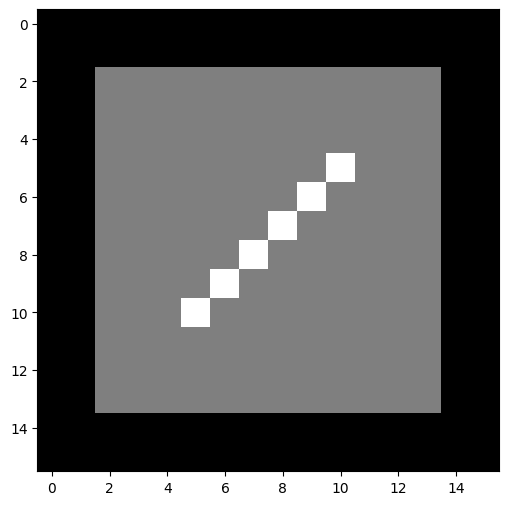

Figure 6: Array represented as a 2D grayscale image.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/2D_image.png'
display(Image(filename=image_path, width=400))
caption = '<p style="text-align: left;">Figure 6: Array represented as a 2D grayscale image.</p>'
display({'text/html': caption}, raw=True)

3. as a **3D function**, being the third dimension the intensity function of the coordinate $(x,y)$:

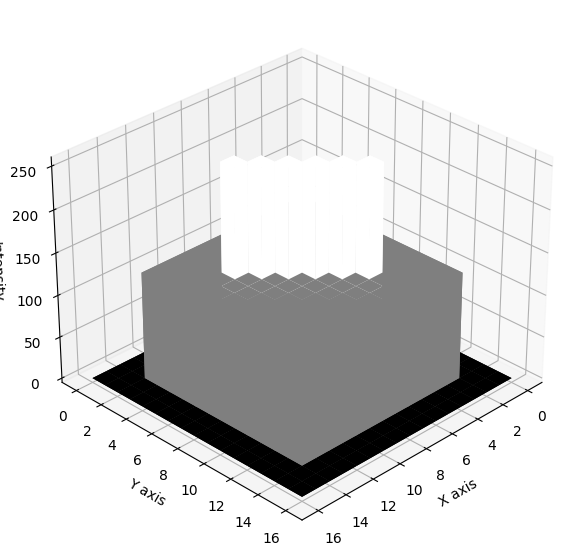

Figure 7: Array represented as a 3D function.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/3D_image.png'
display(Image(filename=image_path, width=500))
caption = '<p style="text-align: left;">Figure 7: Array represented as a 3D function.</p>'
display({'text/html': caption}, raw=True)

### 2.6. Color Images


A **color image** is be represented similarly to a grayscale image, but instead of one function, usually **three separate functions** are defined to represent different color components.

It can be considered as a **stack of several layers**, in which the color of each pixel is defined by a tupla of values.



####Color spaces

A **color space** is a mathematical specification that defines a **coordinate system**, such that each color in the model is represented by a unique point.

Different color spaces serve different purposes, and each is **optimized** for specific tasks.

There are different color spaces or models. The most common is the **RGB**, which consists of three spectral components of red (R), green (G), and blue (B) color for each pixel. The rest of the colors are obtained by **linear combination** of the three independent components.


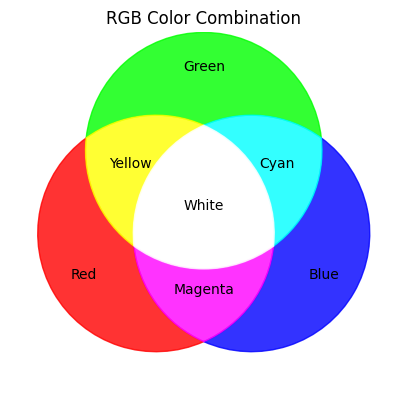

Figure 8: Color addition in RGB color space.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/RGB_color_combinations.png'
display(Image(filename=image_path, width=400))
caption = '<p style="text-align: left;">Figure 8: Color addition in RGB color space.</p>'
display({'text/html': caption}, raw=True)

If each **color channel** has a **depth** of 8 bits ($2^8 = 256$ different intensities), each pixel has a depth of $3 \times 8 = 24$ bits, and so, the **total number of possible colors** in a 24-bit RGB image is $(2^8)^3 = 16.777.216$.



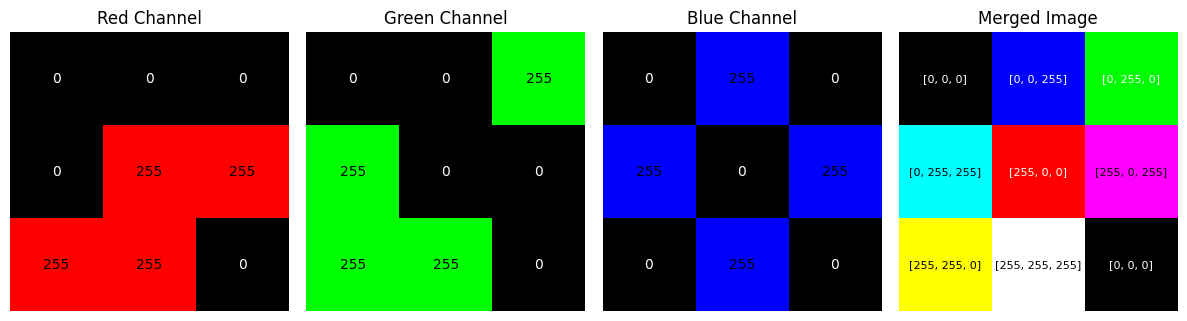

Figure 9: Possible color combinations of 0 and 255 values for RGB color space.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/RGB_color_combinations_0-255.png'
display(Image(filename=image_path, width=900))
caption = '<p style="text-align: left;">Figure 9: Possible color combinations of 0 and 255 values for RGB color space.</p>'
display({'text/html': caption}, raw=True)

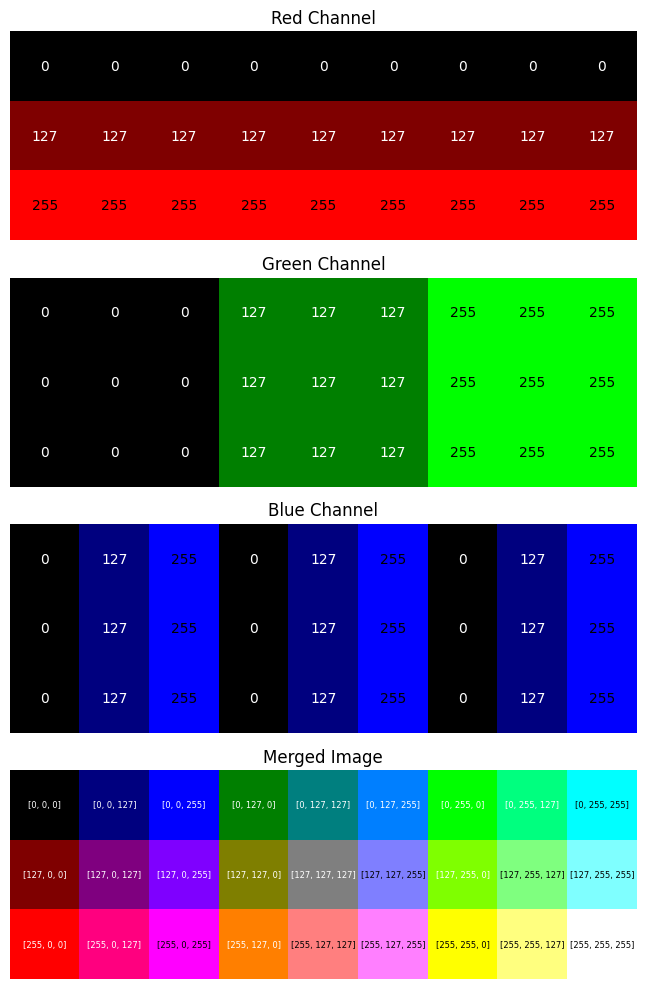

Figure 10: Possible color combinations of 0, 127 and 255 values for RGB color space.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/RGB_color_combinations_0-127-255.png'
display(Image(filename=image_path, width=600))
caption = '<p style="text-align: left;">Figure 10: Possible color combinations of 0, 127 and 255 values for RGB color space.</p>'
display({'text/html': caption}, raw=True)

#### Color Spaces in Medical Imaging

In medical imaging, several color spaces are commonly used, each serving different purposes depending on the application and type of analysis.

* **Grayscale**

  Use shades of gray to represent the **intensity** of each pixel. This is the most common, and is used in **X-rays, CT scans, MRI, and ultrasound imaging**.

* **RGB (Red, Green, Blue)**

  Standard color space where colors are represented as **combinations of red, green, and blue values**.
  
  These colors correspond to the **types of photoreceptor cells (cones)** that are sensitive to red, green, and blue light, although humans do not perceive images in the RGB color space (rather in CIELAB or HSV).
  
  It has application where color information is important for diagnosis and the image has to be visualize in monitors or come from cameras, such as **endoscopy or melanoma detection**.

  <img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*_LvMaBFLax7GWbTuBkT9Ag.jpeg" alt="" width="500">
  <p style="text-align: center;">
  Figure 11: RGB color space. Source:
  <a href="https://medium.com/lightricks-tech-blog/an-intro-to-color-spaces-and-how-i-used-them-for-my-game-f712153b114">Medium</a>
  </p>


* **HSI (Hue, Saturation, Intensity)**

  HSI **models human color perception** more closely than RGB, making it useful for tasks that involve color differentiation. The three componentes are:

    * **Hue (H)**: color type (0º = red, 120º = green, 240º = blue, ...),
    * **Saturation (S)**: intensity (from 0 to 1 or from 0 to 100%, with S = 0 being desaturated (gray) and S = 1 fully saturated (pure)),
    * **Intensity (I)**: brightness (from 0 to 1 or 0 to 100%, with I = 0 being black and I = 1 white).
    
  This model **separates** the image luminance (intensity) from color information (hue and saturation), and is used for image segmentation and enhancement.

  <img src="https://support.cognex.com/docs/cvl_900/web/en/cvl_vision_tools/Content/Images/29_45.jpg" alt="" width="600">
  <p style="text-align: center;">
  Figure 12: HSI color space. Source:
  <a href="https://support.cognex.com/docs/cvl_900/web/en/cvl_vision_tools/Content/Topics/VisionTools/HSI_Color_Space.htm?TocPath=Color%20Tools%7CColor%20Tools%20Overview%7CUnderstanding%20Color%20Spaces%7C_____2">Cognex.com</a>
  </p>

* **HSV (Hue, Saturation, Value)**

  HSV has similarities with HSI: both provide a more intuitive representation of colors based on human perception. It decomposes colors into three components:
  
  * **Hue (H)**: color type, as in HSI (0º = red, ...),
  * **Saturation (S)**: vividness of the color, as in HSI, although the calculation is different (0-1 or 0-100%, with S = 0 being desaturated (gray) and S = 1 fully saturated (pure)).
  * **Value (V)**: brightness of the color, ranging from 0 (black) to 1 or 100% (full brightness for a given color, not necessarily white).
  
  The **difference between Value and Intensity** is that when Intensity = 1 the color becomes white, regardless of hue or saturation, and when Value = 1, the color is as bright as possible, but it remains the fully saturated color rather than turning white unless S = 0.
    
  HSV is often **more efficient** to convert to and from RGB compared to HSI, and is more commonly used in image processing.

  <img src="https://ucarecdn.com/c3e7dadc-5759-4d00-a204-9982492464ef/-/stretch/off/-/resize/2200x/-/format/webp/" alt="" width="400">
  <p style="text-align: center;">
  Figure 13: HSV color space. Source:
  <a href="https://hyperskill.org/learn/step/13179">Hyperskill.org</a>
  </p>


* **YUV/YCrCb (Luminance and Chrominance)**

  YUV and YCrCb color spaces **separate the luminance (Y) from the chrominance (U, V or Cr, Cb)**, which resembles the way the human vision system processes brightness and color information separately. It was **designed for TV broadcasting** and later adapted to digital imaging and video systems.
  
  It allows **efficient video compression and processing**, maintaining image quality with reduced data. Their applications includes video **endoscopy** and compression algorithms.


* **CIELAB (L\*, a\*, b*)**

  This model is designed to be **perceptually uniform** (the same amount of numerical change in values corresponds to roughly the same amount of perceived change).
  
  Its components are **L\*** for lightness, and **a\*** and **b\*** for the color-opponent dimensions.
  
  It is used in **tissue segmentation**, where precise color differentiation is important.

* **Pseudocolor**

  It is used in **PET** (Positron Emission Tomography), **SPECT** (Single Photon Emission Computed Tomography), and functional MRI (fMRI) imaging.
  
  This modalities produce grayscale images that map to specific colors, usually as a **heatmap**, to indicate higher or lower intensity levels (warmer/cooler colors) of radiotracer accumulation.

#### Conversion of Color Spaces


##### ***RGB to Grayscale***

The conversion from RGB to grayscale applies different coefficients to the R, G, and B channels, reflecting **how the human eye perceives brightness** (being more sensitive to green and less to blue):

$$\text{Gray} = 0.2989 \cdot R + 0.5870 \cdot G + 0.1140 \cdot B$$


##### ***RGB to HSI (Hue, Saturation, Intensity)***

Equations for converting from RGB to HSI color spaces are given by:

$$
H =
\begin{cases}
\theta & \text{if } B \le G \\
360 - \theta & \text{if } B > G
\end{cases}
$$

with

$$
\theta = \cos^{-1} \left( \frac{\frac{1}{2}[(R - G) + (R - B)]}{\sqrt{(R - G)^2 + (R - B)(G - B)}} \right)
$$

$$
S = 1 - \frac{3}{(R + G + B)} \min(R, G, B)
$$

$$
I=\dfrac{1}{3}(R+G+B)
$$


##### ***RGB to HSV (Hue, Saturation, Value)***

Conversion from RGB to HSV follows these steps:

1.	Normalize the RGB values:

$$r = \frac{R}{255}, \quad g = \frac{G}{255}, \quad b = \frac{B}{255}$$

2.	Calculate the maximum and minimum values:

$$C_{\max} = \max(r, g, b)$$

$$C_{\min} = \min(r, g, b)$$

$$\Delta = C_{\max} - C_{\min}$$

3.	Compute Value (V):

$$V = C_{\max}$$

4.	Compute Saturation (S):

$$S = \begin{cases}
0 & \text{if } C_{\max} = 0 \\
\dfrac{\Delta}{C_{\max}} & \text{otherwise}
\end{cases}$$

5.	Compute Hue (H):

$$
H = \begin{cases}
0 & \text{if } \Delta = 0 \\
60 \times \left( \frac{g - b}{\Delta} \mod 6 \right) & \text{if } C_{\max} = r \\
60 \times \left( \frac{b - r}{\Delta} + 2 \right) & \text{if } C_{\max} = g \\
60 \times \left( \frac{r - g}{\Delta} + 4 \right) & \text{if } C_{\max} = b
\end{cases}
$$

If (H) is negative, then add 360 to it to get the correct hue value.


##### ***RGB to YUV***

The conversion from RGB to YUV uses the following transformation matrix:

$$\begin{bmatrix}
Y \\
U \\
V
\end{bmatrix}
=
\begin{bmatrix}
0.299 & 0.587 & 0.114 \\
-0.14713 & -0.28886 & 0.436 \\
0.615 & -0.51499 & -0.10001
\end{bmatrix} \cdot
\begin{bmatrix}
R \\
G \\
B
\end{bmatrix}$$

### 2.7. File Formats

**Color images** (usually in the form of rectangular arrays of RGB triplets) are **not stored or transmitted in this format**.

Several formats are used, according to the method in which they represent the image content for **efficient** storage and transmission:

* **BMP** (Bitmap Image File, \*.bmp): stores bitmap digital images in various color depths, with optional RLE (Run-Length Encoding) lossless compression.
* **JPEG** (Joint Photographic Experts Group, \*.jpeg, \*.jpg, \*.jpe): uses DCT (Discrete Cosine Transform) compression, which is lossy.
* **JPEG 2000** (\*.jp2): utilizes wavelet-based compression techniques, which can be both lossless and lossy, offering higher quality images with fewer artifacts compared to regular JPEG.
* **PNG** (Portable Network Graphics, \*.png): employs DEFLATE compression, a lossless compression algorithm that combines LZ77 (Lempel-Ziv 1977) and Huffman coding to efficiently compress data without losing any information.
* **TIFF** (Tagged Image File Format, \*.tiff, \*.tif): an adaptable format that supports various compression methods, including LZW (Lempel-Ziv-Welch, lossless), PackBits (lossless), and JPEG (lossy). TIFF can handle images and data within a single file.

In addition, **medical imaging** uses specialized **file formats** (such as DICOM and NIfTI) to store the images along with patient data and details about the study conditions.

### 2.8. Image Histogram

A **histogram** is a visual representation of the **intensity distribution of pixel values** in an image.

The **x-axis** represents pixel intensity values, while the **y-axis** shows the frequency or count of pixels for each value.

For **integer-based images**, with pixel values ranging from 0 to 255, the x-axis will have 256 distinct values, known as **bins**.

Histograms are used to assess the overall **image quality**:

*	The **left** side of the histogram represents lower pixel values (**darker**). A high frequency in this region suggests more pixels with low intensities in the image.

*	The **right** side of the histogram represents higher pixel values (**brighter**).



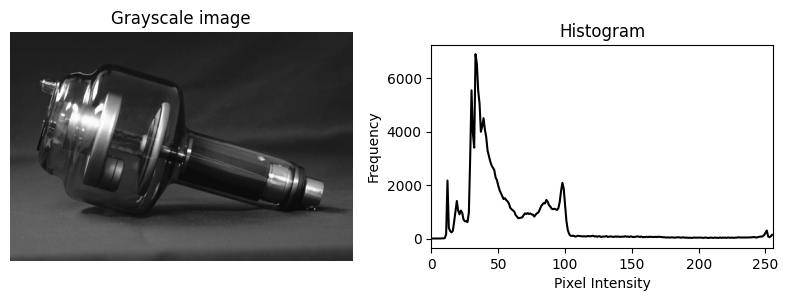

Figure 14: Grayscale image (left) and histogram (right).

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/Histogram.png'
display(Image(filename=image_path, width=800))
caption = '<p style="text-align: left;">Figure 14: Grayscale image (left) and histogram (right).</p>'
display({'text/html': caption}, raw=True)

## 3.- Image Basics in OpenCV

### 3.1. Installing OpenCV

OpenCV (Intel, 1999) is an open-source library used for computer vision and image processing.

To start with OpenCV, the basic operations [1] are **installing** and **importing** the library, **loading**, **displaying** and **saving** images, and obtaining information about basic properties, such as dimensions.

**Headless vs Full Version of OpenCV**

There are **two versions** of OpenCV:

* **Headless** (opencv-python-headless): does not include support for GUI-related functionalities like displaying images using GUI windows, handling mouse events, or rendering graphics on screen. It is designed for environments where GUI interactions are not needed or supported, such as Google Colab.

* **Full version**: includes all functionalities of OpenCV, including GUI capabilities.

[1]: https://docs.opencv.org/4.x/index.html

In [ ]:
# Install OpenCV (headless)
!pip install opencv-python-headless

In [ ]:
import cv2 # import the OpenCV library

In [ ]:
print("OpenCV version:", cv2.__version__) # print the OpenCV version

OpenCV version: 4.10.0


### 3.2. Reading and saving images

#### **Reading images from Google Drive filesystem**

For historical reasons, OpenCV uses the **BGR** (Blue, Green, Red) format by default, due to a more **efficient memory access** patterns and **processing speed** with older hardware.

This means that images loaded using `cv2.imread()` will have their color channels in the order Blue, Green, and Red. This is different from the **RGB** format used by many other libraries, such as Matplotlib, which expects images in Red, Green, Blue order. The function `cvtColor` **converts** an image format into another.

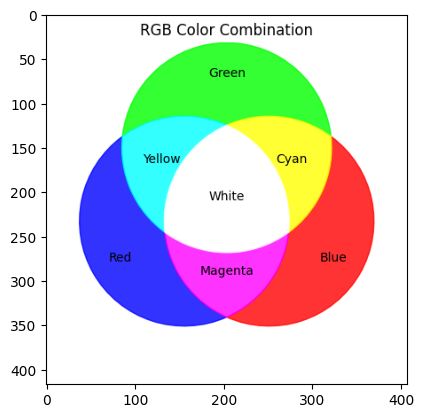

In [ ]:
# Path in Google Drive filesystem where the image is located
image_path = '/content/drive/MyDrive/PIM/Images/RGB_color_combinations.png'

# Read the image from the specified file path using OpenCV's imread function
# The function returns the image as a NumPy array
# By default, the image is loaded in color (BGR format)
# If the image is not found or the path is incorrect, the function will return 'None'
image = cv2.imread(image_path)

# Check if the image loaded successfully
if image is None:
    print('Error: ould not load the image.')

# Display the image using Matplotlib's imshow function
plt.imshow(image)

# Render and display the image plot in non-interactive environments like Google Colab
plt.show()

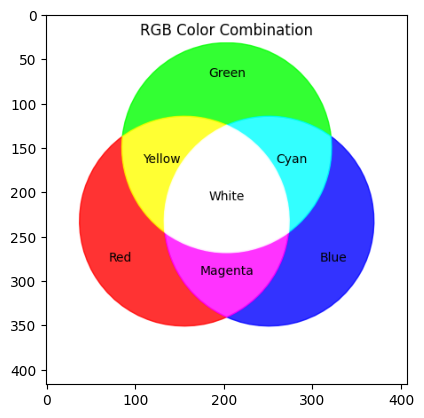

In [ ]:
# Path in Google Drive filesystem where the image is located
image_path = '/content/drive/MyDrive/PIM/Images/RGB_color_combinations.png'

# Read the image from the specified file path
# By default, the image is loaded in color (BGR format)
image = cv2.imread(image_path)

# Convert the image from BGR to RGB with cv2.COLOR_BGR2RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib's imshow function
# By default, if the image is grayscale, it is displayed with a colormap
# (cmap='gray' for grayscale images)
plt.imshow(image)

# Render and display the image plot
plt.show()

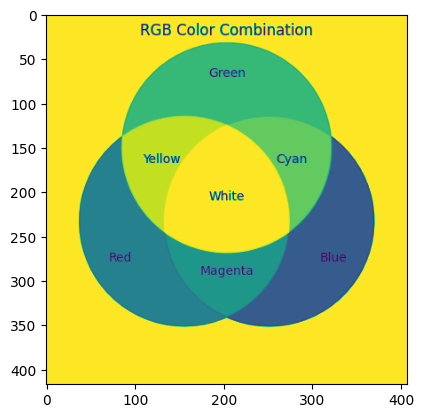

In [ ]:
# Path in Google Drive filesystem where the image is located
image_path = '/content/drive/MyDrive/PIM/Images/RGB_color_combinations.png'

# Read the image from the specified file path
image_bgr = cv2.imread(image_path)

# Convert the image from BGR to grayscale with cv2.COLOR_BGR2GRAY
image_grayscale = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Display the image
plt.imshow(image_grayscale) # Uses a default colormap

# Render and display the image plot
plt.show()

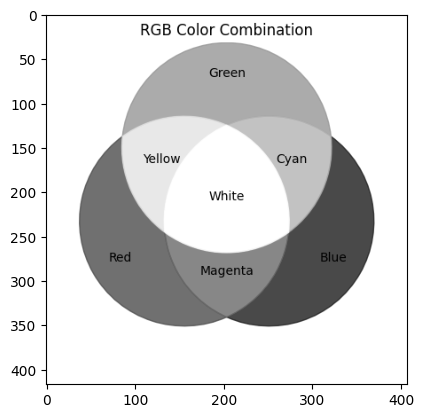

In [ ]:
# Path where the image is located
image_path = '/content/drive/MyDrive/PIM/Images/RGB_color_combinations.png'

# Read the image from the specified file path
image_bgr = cv2.imread(image_path)

# Convert the image from BGR to grayscale with cv2.COLOR_BGR2GRAY
image_grayscale = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Display the image
plt.imshow(image_grayscale, cmap='gray') # Use cmap='gray' to display it in grayscale

# Render and display the image plot
plt.show()

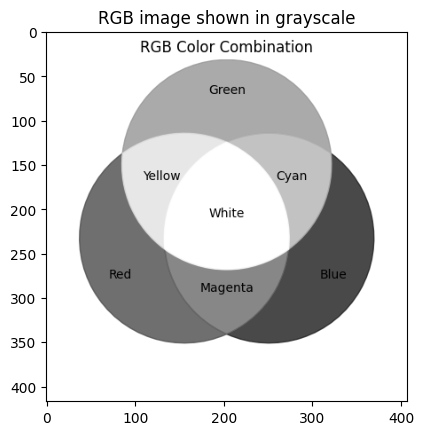

In [ ]:
# Path where the image is located
image_path = '/content/drive/MyDrive/PIM/Images/RGB_color_combinations.png'

# Read the image in grayscale directly
image_grayscale = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Show the image
plt.imshow(image_grayscale, cmap='gray')
plt.title('RGB image shown in grayscale')  # Add a title to the image
plt.show()

#### **Reading images from the local filesystem**

Saving RGB_color_combinations.png to RGB_color_combinations (5).png


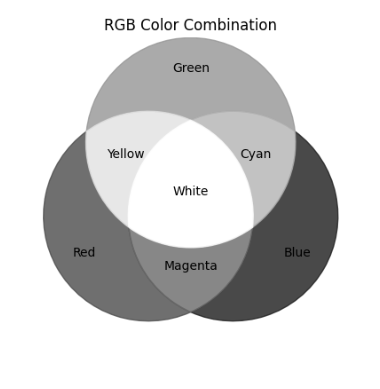

In [ ]:
# Allow to interact with the local filesystem
from google.colab import files

# Upload the image from the local filesystem (via dialog box)
# uploaded is a dictionary returned by files.upload() that stores the filenames
# as the first element
uploaded = files.upload()

# Get the image filename
# uploaded.keys() returns an object that contains all the 'keys' (filenames)
# list(uploaded.keys()) converts that object into a list
# That list will contain the filenames of the files
# [0] refers to the first filename
image_path = list(uploaded.keys())[0]

# Read the image using OpenCV
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the image using matplotlib
plt.imshow(image, cmap='gray')
plt.axis('off')  # Hide the axes
plt.show()

#### **Reading images from URLs**

In [ ]:
!pip install urllib3 # install the 'urllib3' package to work with URLs

import urllib.request # import the 'urllib.request' module to work with URLs

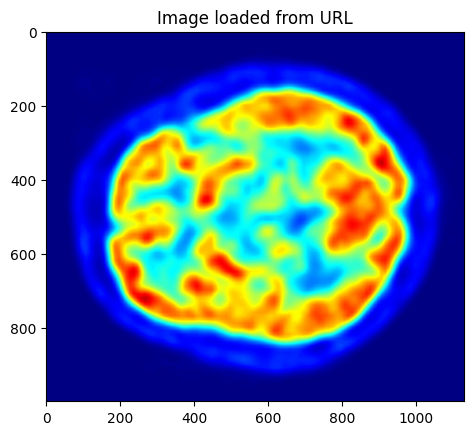

In [ ]:
# Define the URL of the image to download
url = 'https://upload.wikimedia.org/wikipedia/commons/c/c6/PET-image.jpg'

# Download the image from the specified URL
# - urllib.request.urlopen(url) opens the URL and returns a response object (a file-like object)
resp = urllib.request.urlopen(url)

# Read the content of the response object into a byte string
# - resp.read() reads the entire content of the response (i.e., the image data) as a byte string
image_data = resp.read()

# Convert the byte string to a NumPy array
# - bytearray(image_data) converts the byte string into a bytearray (a mutable sequence of bytes)
# - np.array(...) creates a NumPy array from the bytearray
# - dtype=np.uint8 specifies that the data type of the array elements is 8-bit unsigned integers
image_np = np.array(bytearray(image_data), dtype=np.uint8)

# Decode the NumPy array into an OpenCV image
# - cv2.imdecode(image_np, cv2.IMREAD_GRAYSCALE) as performing a similar function to
#   cv2.imread(), but instead of reading an image from a file on disk, it decodes the image
#   from a NumPy array that contains binary data
# - image_np is the input array containing the image data
# - cv2.IMREAD_COLOR is a flag that specifies how the image should be read (in this case,
#   the image is read in color mode (as a BGR image)
# - The result is stored in the image variable, which is now an OpenCV-compatible image
image = cv2.imdecode(image_np, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converts BGR to RGB

# Display the image using matplotlib
plt.imshow(image, cmap='gray')
plt.title('Image loaded from URL')
plt.show()

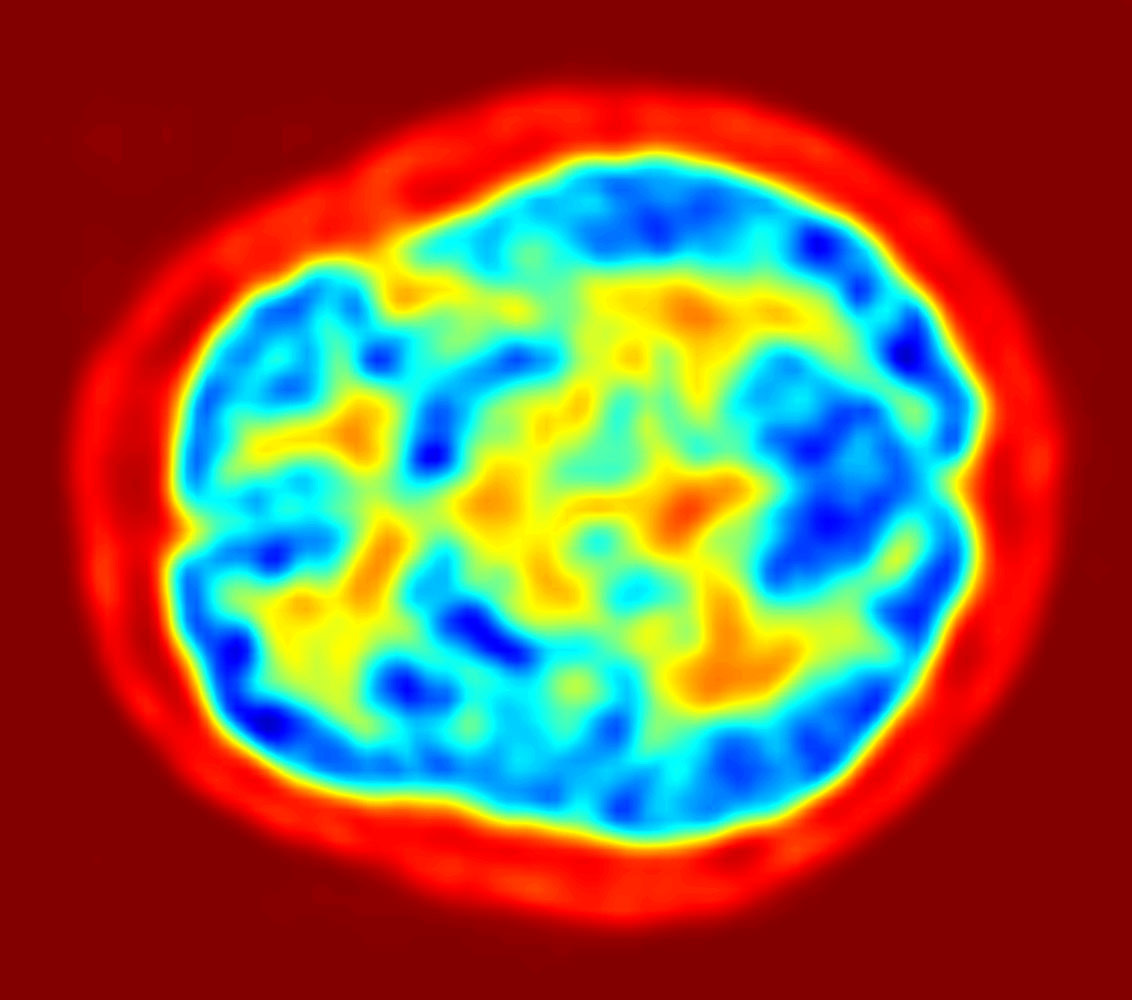

In [ ]:
# Import the function cv2_imshow
# Images can be displayed using the function cv2.imshow; however, this function
# does not work in Colab, so a specific function (cv2_imshow) is required for this
from google.colab.patches import cv2_imshow

# Display the image using OpenCV (more limited than Matplotlib)
# cv2_imshow expects the image in BGR format (OpenCV's default color format)
cv2_imshow(image)

#### **Saving images**

`cv2.imwrite()` is a function in OpenCV that allows to **save** an image to a file. It is used to **write** an image, represented as a NumPy array, to a specified file path. It returns `True` if the image is successfully saved (`False` otherwise).

In [ ]:
# Saves the image to a file in the local filesystem using cv2.imwrite
cv2.imwrite('/content/drive/MyDrive/PIM/Images/saved_image.png', image)

True

### 3.3. Grayscale Images

#### **Basic template for image processing**

In [ ]:
#### Template for reading, processing, writing and visualizing images

# Import modules
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Read the image and return it as a NumPy array
image = cv2.imread('/content/drive/MyDrive/PIM/Images/PET-image.jpg', cv2.IMREAD_GRAYSCALE)

# Function to process the image
def image_processing(image, parameter):
    # Placeholder for actual image processing operations
    processed_image = image # No processing is done in this case
    return processed_image  # Return the processed image

# OR

# Processing algorithms
# ...
# ...

# Process the image and obtain the modified image
processed_image = image_processing(image)

# Save the processed image in the specified path
cv2.imwrite('/content/drive/MyDrive/PIM/Images/processed_image.png', processed_image)

# Display the processed image
plt.imshow(processed_image, cmap='gray')
plt.show()

#### **Reading dimensions and values of images**

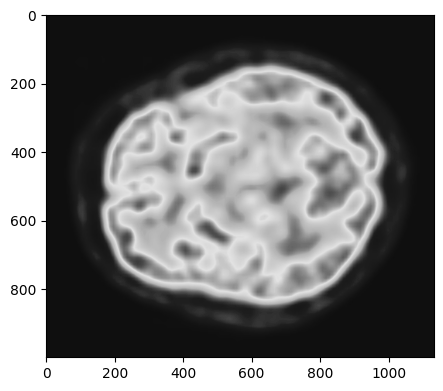

In [ ]:
# Read the image
image_bgr = cv2.imread('/content/drive/MyDrive/PIM/Images/PET-image.jpg') # BGR format
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB) # RGB format
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY) # grayscale format

# Display the processed image
plt.figure(figsize=(5, 5)) # set the size of the figure bounding box (x, y)
plt.imshow(image_gray, cmap='gray', vmin=0, vmax=255) # specifies the grayscale range
plt.show()

In [ ]:
# Print information about the RGB image
print(f"Type of original image: {type(image_rgb)}")
print(f"Data type of original image: {image_rgb.dtype}")
print(f"Shape of original image: {image_rgb.shape}")
# returns the number of rows, columns and channels
height_rgb, width_rgb, channels_rgb = image_rgb.shape
print("Height:", height_rgb)
print("Width:", width_rgb)
print("Channels:", channels_rgb)
aspect_ratio = width_rgb / height_rgb
print(f"Aspect ratio: {aspect_ratio:.2f}") # print aspect_ratio (float) with 2 decimals

Type of original image: <class 'numpy.ndarray'>
Data type of original image: uint8
Shape of original image: (1000, 1132, 3)
Height: 1000
Width: 1132
Channels: 3
Aspect ratio: 1.13


In [ ]:
# Print information about the grayscale image
print(f"\nType of original image: {type(image_gray)}")
print(f"Data type of original image: {image_gray.dtype}")
print(f"Shape of grayscale image: {image_gray.shape}")
print(f"Maximum pixel value in grayscale image: {np.max(image_gray)}")
print(f"Minimum pixel value in grayscale image: {np.min(image_gray)}")
height_gray, width_gray = image_gray.shape # returns the number of rows and columns (no channels)
print("Height:", height_gray)
print("Width:", width_gray)


Type of original image: <class 'numpy.ndarray'>
Data type of original image: uint8
Shape of grayscale image: (1000, 1132)
Maximum pixel value in grayscale image: 227
Minimum pixel value in grayscale image: 14
Height: 1000
Width: 1132


#### **Cropping the image**

Section of the Image:
[[ 15  15  15 ...  40  41  41]
 [ 15  15  15 ...  40  41  42]
 [ 15  15  15 ...  41  42  43]
 ...
 [ 38  38  38 ... 172 173 174]
 [ 38  38  38 ... 175 177 177]
 [ 38  38  38 ... 177 178 180]]


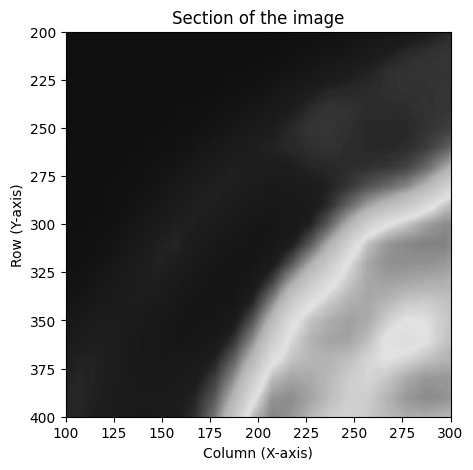

In [ ]:
# Define the slicing coordinates
row_start, row_end = 200, 400
col_start, col_end = 100, 300

# Slice the image to extract the section: [row_start:row_end, col_start:col_end]
section = image_gray[row_start:row_end, col_start:col_end]

# Print the extracted section of the array
print("Section of the Image:")
print(section)

# Plot the section with the correct axis labels
plt.figure(figsize=(5, 5))
plt.imshow(section, cmap='gray', vmin=0, vmax=255,
           extent=[col_start, col_end, row_end, row_start])

# Adjust the title and axis labels
plt.title("Section of the image")
plt.xlabel("Column (X-axis)")
plt.ylabel("Row (Y-axis)")
plt.show()

### 3.4. Color Images

#### RGB images

##### ***Extracting color channels***

In [ ]:
# Read the image
image_bgr = cv2.imread('/content/drive/MyDrive/PIM/Images/PET-image.jpg')

# Read the dimensions of the image (BGR)
height_bgr, width_bgr, channels_bgr = image_bgr.shape # returns the number of rows, columns and channels
print("Height:", height_bgr)
print("Width:", width_bgr)
print("Channels:", channels_bgr)

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB) # image now is in RGB format

Height: 1000
Width: 1132
Channels: 3


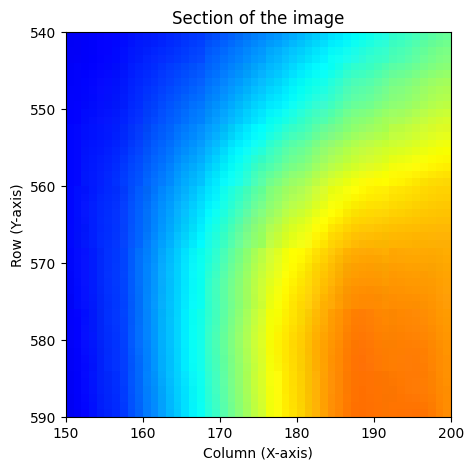

In [ ]:
# Load the image and convert it to RGB format
image_bgr = cv2.imread('/content/drive/MyDrive/PIM/Images/PET-image.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Define the slicing coordinates
row_start, row_end = 540, 540+50
col_start, col_end = 150, 150+50

# Slice the image to extract the section: [row_start:row_end, col_start:col_end]
section = image_rgb[row_start:row_end, col_start:col_end]

# Plot the section with the correct axis labels
plt.figure(figsize=(5, 5))
plt.imshow(section, extent=[col_start, col_end, row_end, row_start])

# Adjust the title and axis labels
plt.title("Section of the image")
plt.xlabel("Column (X-axis)")
plt.ylabel("Row (Y-axis)")
plt.show()

In [ ]:
# Split the section into R, G, B channels by slicing the NunmPy array
r_channel = section[:, :, 0]
g_channel = section[:, :, 1]
b_channel = section[:, :, 2]

# Print the section of the R, G, B channels
print("Section of the image - R Channel:")
print(r_channel)
print("Section of the image - G Channel:")
print(g_channel)
print("Section of the image - B Channel:")
print(b_channel)

Section of the image - R Channel:
[[  1   1   0 ...  89  98 103]
 [  1   2   0 ... 100 107 112]
 [  2   2   0 ... 110 119 123]
 ...
 [  0   0   3 ... 254 255 255]
 [  0   0   2 ... 253 255 255]
 [  0   0   3 ... 254 255 255]]
Section of the image - G Channel:
[[  0   0   0 ... 254 254 255]
 [  0   0   0 ... 252 253 255]
 [  0   0   0 ... 254 254 255]
 ...
 [  0   1   6 ... 126 135 141]
 [  0   1   5 ... 124 134 141]
 [  1   1   3 ... 122 132 140]]
Section of the image - B Channel:
[[244 246 248 ... 162 155 152]
 [246 247 250 ... 151 144 141]
 [247 247 251 ... 141 134 133]
 ...
 [244 251 255 ...   0   0   0]
 [244 251 255 ...   0   0   1]
 [242 249 255 ...   0   0   2]]


##### ***Plotting the color channels as color images***

Shape of the original image: (1000, 1132, 3)
Shape of red_channel: (1000, 1132)
Shape of red_image: (1000, 1132, 3)


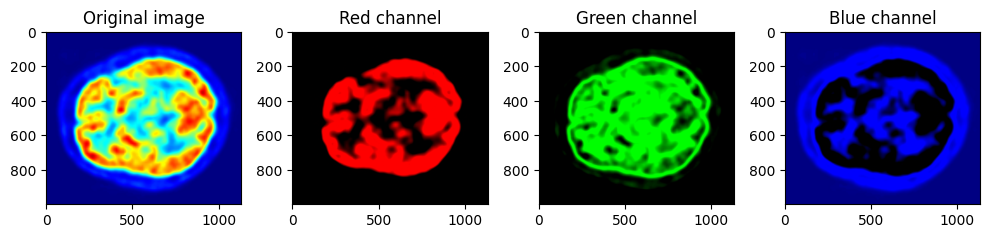

In [ ]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/PIM/Images/PET-image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Extract the three channels
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]

# Create an array of 0's of the same size of the image
# image.shape returns a tuple with three values: (height, width, channels)
# image.shape[0]: height (number of rows)
# image.shape[1]: width (number of columns)
# image.shape[2]: number of color channels
# image.shape[:2] returns (height, width)
zeros = np.zeros(image.shape[:2], dtype = 'uint8')

# Creates three images, each with only one channel and the other two, with 0's,
# - np.stack convert three 2D arrays into one 3D array (height, width, 3),
#   where each 2D array represents a channel (red, green, blue)
# - axis = -1: specifies the index of the new axis in the output array
#   ([-1] is equivalent to [2], the last axis or dimension, which represents the color channel)
red_image = np.stack([red_channel, zeros, zeros], axis=-1)
green_image = np.stack([zeros, green_channel, zeros], axis=-1)
blue_image = np.stack([zeros, zeros, blue_channel], axis=-1)

# Print dimensions of arrays
print("Shape of the original image:", image.shape)
print("Shape of red_channel:", red_channel.shape)
print("Shape of red_image:", red_image.shape)

# Create a figure with a single row and four columns
plt.figure(figsize=(10, 3))

# Plot the original image
plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title("Original image")

# Plot the red channel
plt.subplot(1, 4, 2)
plt.imshow(red_image)
plt.title("Red channel")

# Plot the green channel
plt.subplot(1, 4, 3)
plt.imshow(green_image)
plt.title("Green channel")

# Plot the blue channel
plt.subplot(1, 4, 4)
plt.imshow(blue_image)
plt.title("Blue channel")

# Adjust layout
plt.tight_layout()
plt.show()

##### ***Plotting the color channels as grayscale images***

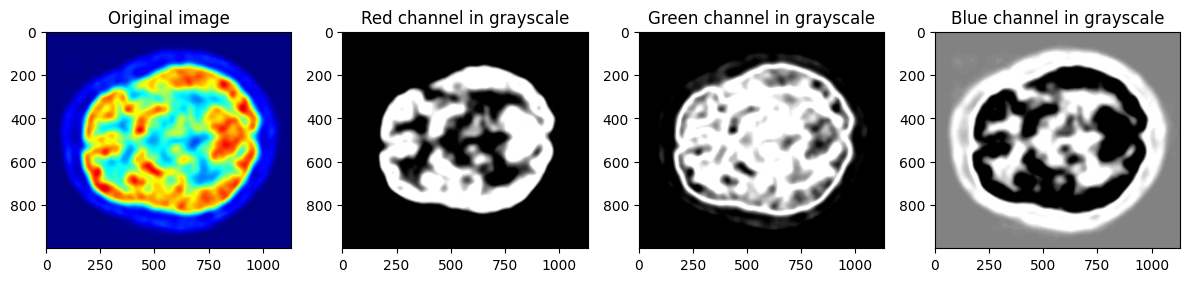

In [ ]:
# Create a figure with a single row and four columns
plt.figure(figsize=(12, 3))

# Plot the original image
plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title("Original image")

# Plot the red channel in grayscale
plt.subplot(1, 4, 2)
plt.imshow(red_channel, cmap='gray', vmin=0, vmax=255)
plt.title("Red channel in grayscale")

# Plot the green channel in grayscale
plt.subplot(1, 4, 3)
plt.imshow(green_channel, cmap='gray', vmin=0, vmax=255)
plt.title("Green channel in grayscale")

# Plot the blue channel in grayscale
plt.subplot(1, 4, 4)
plt.imshow(blue_channel, cmap='gray', vmin=0, vmax=255)
plt.title("Blue channel in grayscale")

# Adjust layout
plt.tight_layout()
plt.show()

##### ***Merge the color image from the color channels***

In addition to slicing for extracting the color channels in an image, OpenCV provides the function `cv2.split(image)`, which **separates** the image into three different arrays and returns them.

Complementary to this function, `cv2.merge([b, g, r])` **combines** separate channels back into a multi-channel image.

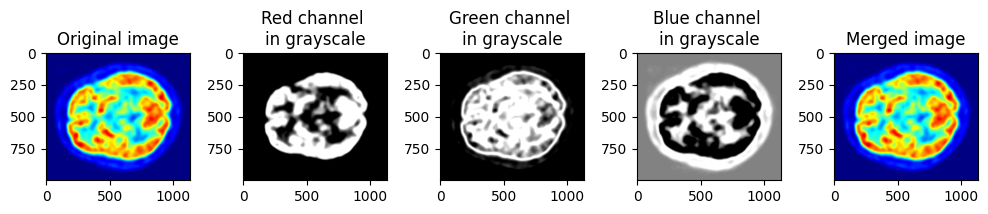

In [ ]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/PIM/Images/PET-image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Split the image into three channels with OpenCV (cv2.split(image))
red_chn, green_chn, blue_chn = cv2.split(image)

# Merge the three channels into one image with OpenCV (cv2.merge([ch1, ch2, ch3]))
merged_image = cv2.merge([red_chn, green_chn, blue_chn])

# Create lists for the images and their titles
images = [image, red_chn, green_chn, blue_chn, merged_image]
titles = ["Original image",
          "Red channel \nin grayscale",
          "Green channel \nin grayscale",
          "Blue channel \nin grayscale",
          "Merged image"]

# Set up the colormap for grayscale images (except the first and last images)
cmaps = [None, 'gray', 'gray', 'gray', None]

# Create a figure with a single row and five columns
plt.figure(figsize=(10, 3))

# Loop through the images and titles
for i in range(5):
    plt.subplot(1, 5, i + 1)  # Create subplot at the i-th position
    plt.imshow(images[i], cmap=cmaps[i], vmin=0, vmax=255)
    plt.title(titles[i])  # Set title

# Adjust layout and display
plt.tight_layout()
plt.show()

##### ***Manipulating channel information***

In [ ]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/PIM/Images/PET-image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Split the image into three channels
red_chn, green_chn, blue_chn = cv2.split(image)

# Dim the blue channel (reduce the intensity of each pixel)
# - 'np.round(...)' is required to ensure that pixel values remain as integers
#   It rounds the float result of the division to the nearest integer
#   but the number is still a float
# - '.astype(np.uint8)' cast the result to 'np.uint8' (integer from 0 to 255)
blue_chn_dimmed = np.round(blue_chn / 2).astype(np.uint8) # divides intensity by 2

# Boost the blue channel and clip the values to a minimum of 0 and a maximum of 255
# Convert to a higher-bit format to avoid overflow
blue_chn_boosted = blue_chn.astype(np.int32) * 2 # doubles the intensity of each pixel
# Clip the values to ensure they are within the 0-255 range
blue_chn_boosted = np.clip(blue_chn_boosted, 0, 255)
# Convert back to np.uint8 to make the image displayable
blue_chn_boosted = blue_chn_boosted.astype(np.uint8)

# Merge the three channels into one image
merged_image = cv2.merge([red_chn, green_chn, blue_chn])
merged_image_dimmed = cv2.merge([red_chn, green_chn, blue_chn_dimmed])
merged_image_boosted = cv2.merge([red_chn, green_chn, blue_chn_boosted])

# Print the three blue channels
print("Original blue channel:\n", blue_chn)
print("Dimmed blue channel:\n", blue_chn_dimmed)
print("Boosted blue channel:\n", blue_chn_boosted)

Original blue channel:
 [[130 130 130 ... 135 135 135]
 [130 130 130 ... 135 135 135]
 [130 130 130 ... 134 134 134]
 ...
 [130 130 130 ... 130 130 130]
 [130 130 130 ... 130 130 130]
 [130 130 130 ... 130 130 130]]
Dimmed blue channel:
 [[65 65 65 ... 68 68 68]
 [65 65 65 ... 68 68 68]
 [65 65 65 ... 67 67 67]
 ...
 [65 65 65 ... 65 65 65]
 [65 65 65 ... 65 65 65]
 [65 65 65 ... 65 65 65]]
Boosted blue channel:
 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


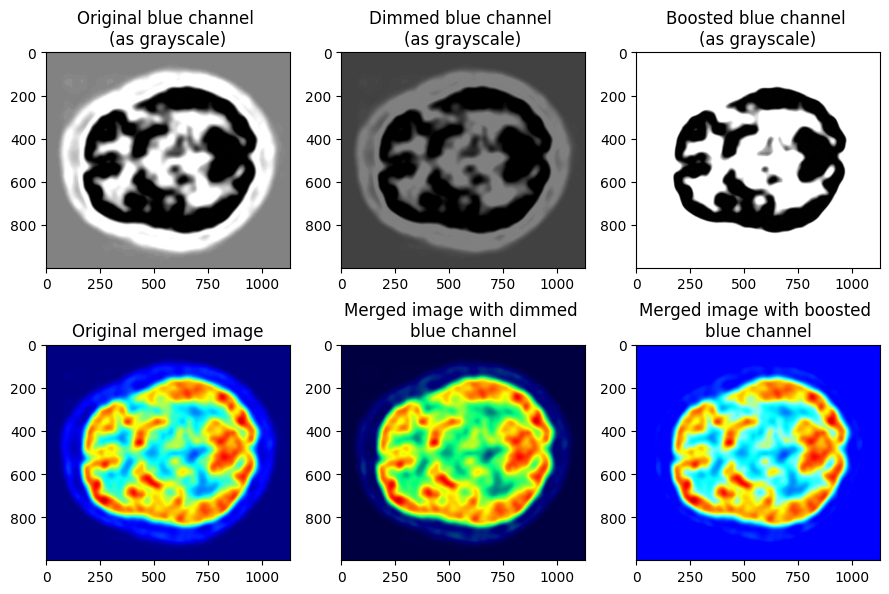

In [ ]:
# Create lists for the images and their respective titles
images = [blue_chn, blue_chn_dimmed, blue_chn_boosted, merged_image, merged_image_dimmed, merged_image_boosted]
titles = [
    "Original blue channel \n(as grayscale)",
    "Dimmed blue channel \n(as grayscale)",
    "Boosted blue channel \n(as grayscale)",
    "Original merged image",
    "Merged image with dimmed \nblue channel",
    "Merged image with boosted \nblue channel"
]
cmaps = ['gray', 'gray', 'gray', None, None, None]  # Use 'gray' for single-channel images, None for color images

# Create a figure with 3 rows and 2 columns
plt.figure(figsize=(9, 6))

# Loop through the images and titles
for i in range(6):
    plt.subplot(2, 3, i + 1)  # Create subplot at the ith position
    plt.imshow(images[i], cmap=cmaps[i], vmin=0, vmax=255)  # Display image with appropriate colormap
    plt.title(titles[i])  # Set the title for each subplot

# Adjust layout and display
plt.tight_layout()
plt.show()

#### HSV images

The components of HSV color space have the following ranges:

* Hue (H): 0 - 360º
* Saturation (S): 0 - 1 or 0% - 100%
* Value (V): 0 - 1 or 0% - 100%

However, in OpenCV, these **ranges are adapted to fit** within an 8-bit integer format (0-255) for compatibility:

* Hue (H): 0 - 179 (corresponding colors:)
	* 0: red
	* 30: yellow
	* 60: green
	* 90: cyan
	* 120: blue
	* 150: magenta
	* 179: close to red due to wrapping around
* Saturation (S): 0 - 255
* Value (V): 0 - 255

##### ***Displaying HSV images***

In [ ]:
# Load the image in BGR format
image_bgr = cv2.imread('/content/drive/MyDrive/PIM/Images/RGB_color_combinations.png')

# Convert the image from BGR to HSV color space
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# Separate the HSV channels
hue_channel, saturation_channel, value_channel = cv2.split(image_hsv)

# Convert the HSV image back to RGB for proper visualization using imshow
image_rgb = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)

# Print the range of each channel
print("Range of values for each channel (HSV):")
print(f'Hue range: {np.min(hue_channel)} to {np.max(hue_channel)}')
print(f'Saturation range: {np.min(saturation_channel)} to {np.max(saturation_channel)}')
print(f'Value range: {np.min(value_channel)} to {np.max(value_channel)}')

Range of values for each channel (HSV):
Hue range: 0 to 179
Saturation range: 0 to 255
Value range: 0 to 255


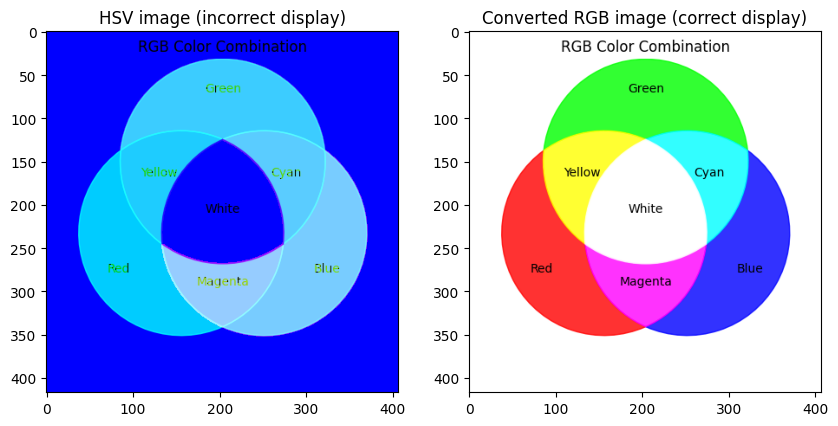

In [ ]:
# Create a figure with 1 row and 2 columns to display the HSV and RGB images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_hsv)  # Display thge HSV image (it shows incorrectly because
                       # imshow is not designed for HSV components)
plt.title("HSV image (incorrect display)")

plt.subplot(1, 2, 2)
plt.imshow(image_rgb)  # Display the RGB image converted from HSV (correctly)
plt.title("Converted RGB image (correct display)")

plt.show()

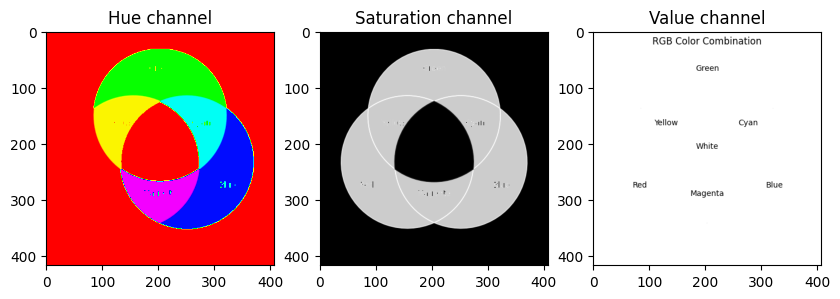

In [ ]:
# Create a figure with 1 row and 3 columns to display the HSV channels
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(hue_channel, cmap='hsv')  # Display the Hue channel
plt.title("Hue channel")

plt.subplot(1, 3, 2)
plt.imshow(saturation_channel, cmap='gray')  # Display the Saturation channel in grayscale
plt.title("Saturation channel")

plt.subplot(1, 3, 3)
plt.imshow(value_channel, cmap='gray')  # Display the Value channel in grayscale
plt.title("Value channel")

plt.show()

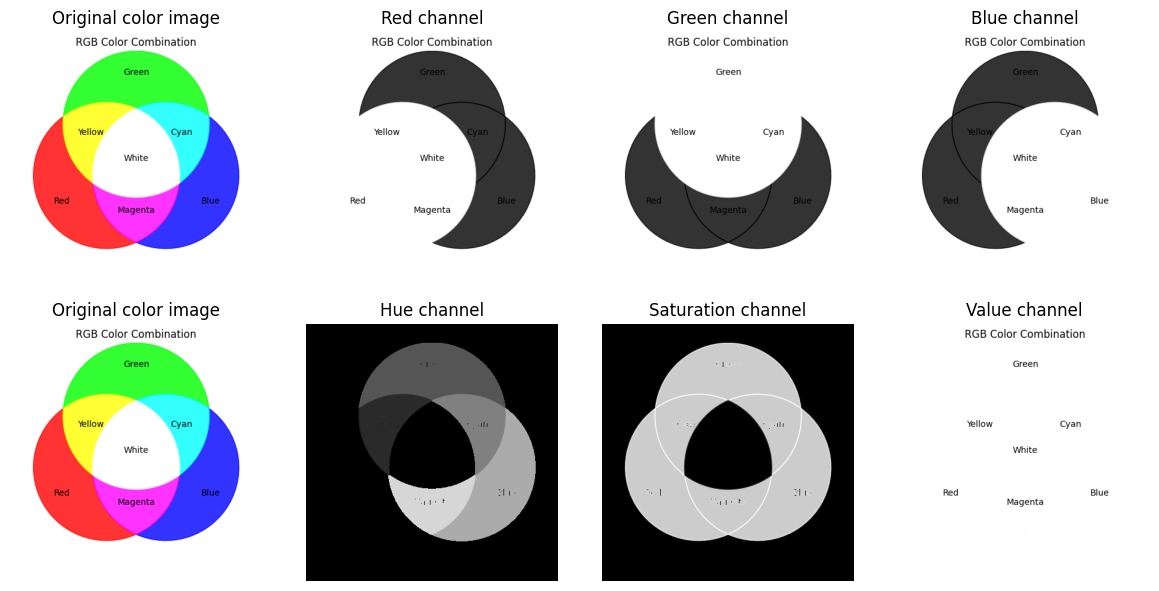

In [ ]:
# Load the image
image_bgr = cv2.imread('/content/drive/MyDrive/PIM/Images/RGB_color_combinations.png')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Separate the RGB channels
red_channel, green_channel, blue_channel = cv2.split(image_rgb)

# Convert RGB image to HSV
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Separate the HSV channels
hue_channel, saturation_channel, value_channel = cv2.split(image_hsv)

# Create lists for the images and their respective titles
images = [image_rgb, red_channel, green_channel, blue_channel,
          image_rgb, hue_channel, saturation_channel, value_channel]
titles = [
    "Original color image", "Red channel", "Green channel", "Blue channel",
    "Original color image", "Hue channel", "Saturation channel", "Value channel"
]

# Set the colormap for grayscale images (None for RGB, 'gray' for single channels)
cmaps = [None, 'gray', 'gray', 'gray', None, 'gray', 'gray', 'gray']

# Create a figure with 2 rows and 4 columns
plt.figure(figsize=(12, 6))

# Loop through the images and titles
for i in range(8):
    plt.subplot(2, 4, i + 1)  # Create subplot at the i-th position
    plt.imshow(images[i], cmap=cmaps[i])  # Display image with correct colormap
    plt.title(titles[i])  # Set title
    plt.axis('off')  # Turn off axis for cleaner display

# Adjust layout and display
plt.tight_layout()
plt.show()

### 3.5. Image Histogram

There are **three** different methods for **handling histograms**. They are available in OpenCV, NumPy, and Matplotlib:

1. **OpenCV**: `cv2.calcHist()`

  This function **computes** the histogram of an image but **does not plot** it. This method requires another function to plot the histogram.
  
  It is used for **image processing tasks** in OpenCV, where the histogram is usually required, so it is optimized for large images.

  The result is a **2D array** (with 1 column) where the histogram counts are stored.

        hist_cv = cv2.calcHist([image], [0], None, [256], [0, 256])

2. **NumPy**: `np.histogram()`

  This function **computes** the histogram but **does not plot** it. As with `cv2.calcHist()`, it requires another function to plot the histogram.

  It **returns** a tupla: the actual **counts** for each intensity bin and the **bin edges**, so it is more oriented to data analysis.

  The first parameter returned is in the form of a **1D vector**.

        hist_np, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])


3. **Matplotlib**: `plt.hist()`

  This function **plots** the histogram of an image or array. It **does not compute** the histogram: it just plots it and returns the data that was used to create the plot.

  If the histogram data are required for further processing, another function will be needed such as `np.histogram()` or `cv2.calcHist()`.

        plt.hist(image.flatten(), bins=256, range=[0, 256], color='black')


Since in image processing the primary goal is to plot the histogram (not only obtain it), **combining these methods** is usually required:

* To compute the histogram: `cv2.calcHist()` or `np.histogram()`
* To plot the histogram: `plt.plot()` or `plt.hist()`

OpenCV: <class 'numpy.ndarray'>, (256, 1)
NumPy: <class 'numpy.ndarray'>, (256,)


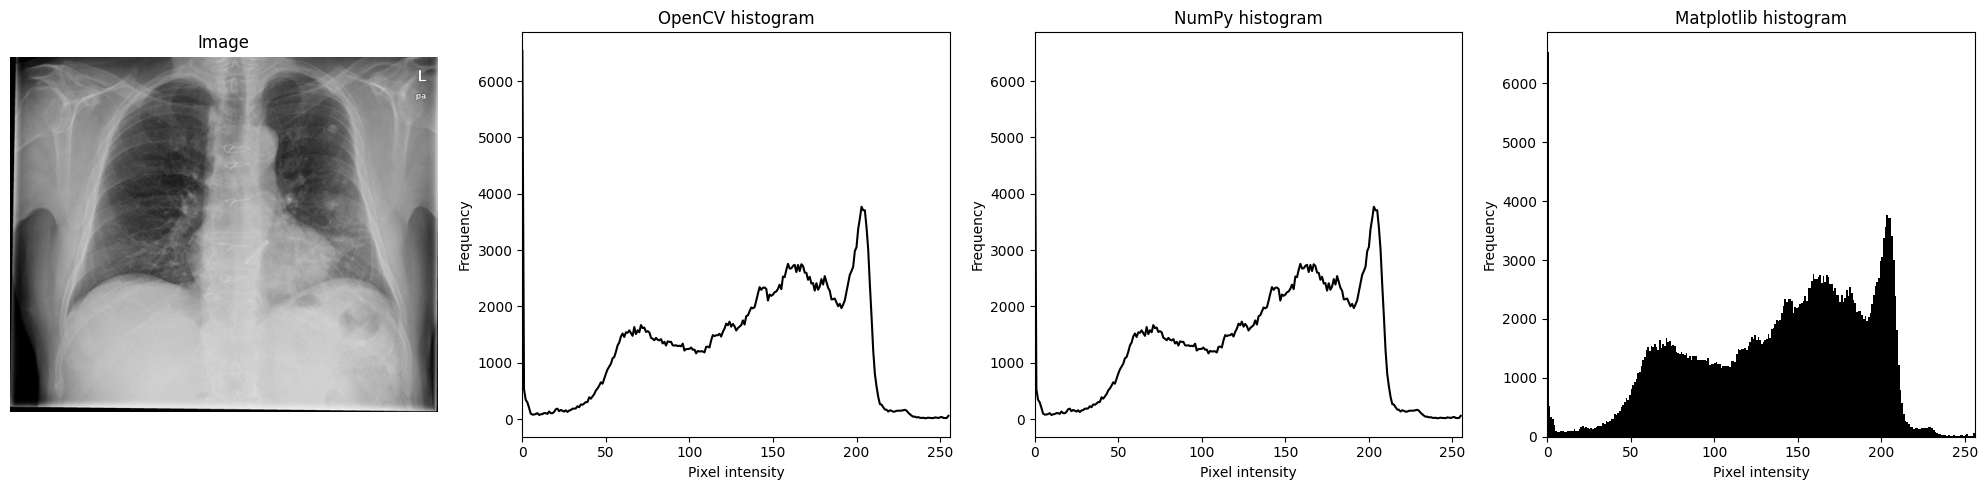

In [ ]:
# Read the image in grayscale
image = cv2.imread('/content/drive/MyDrive/PIM/Images/X-ray_1.jpeg', cv2.IMREAD_GRAYSCALE)

# Method #1: OpenCV calcHist function
# - [image]: input image as a list. The brackets are to create a list containing the NumPy array
# - [0]: index of the channel to be used for computing the histogram.
#        0 for grayscale images, or 0, 1, 2 for B/G/R or R/G/B channels
# - None: mask (region of the image for which to calculate the histogram)
#         If None, the histogram is computed for the entire image.
# - [256]: number of bins in the histogram, representing pixel intensity values from 0 to 255
# - [0, 256]: range of pixel intensity values, from 0 to 255 (the higher end, 256, is exclusive)
# Returns a 2D NumPy array with the shape of (bins, 1)
hist_cv = cv2.calcHist([image], [0], None, [256], [0, 256])

# Method #2: NumPy histogram function
# - image.flatten(): converts the 2D image array into a 1D array (flattened)
# - bins=256: specifies the number of bins, representing the 256 possible intensity values (from 0 to 255)
# - range=[0, 256]: specifies the range of values to be included in the histogram (0 to 255)
# The np.histogram function returns a tupla with two values:
# - hist: the actual histogram array, where each element contains the count of pixels for the corresponding bin
# - _: the bin edges, which are the boundaries of the bins. To ignore them, assign it to _
hist_np, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])

# Print type and shape of both histograms
print(f"OpenCV: {type(hist_cv)}, {hist_cv.shape}") # 2D array of 1 column (nbins, 1)
print(f"NumPy: {type(hist_np)}, {hist_np.shape}")  # 1D vector (nbins,)

# Create a 1x4 subplot
plt.figure(figsize=(20, 5))

# Display the image
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Image')
plt.axis('off')

# Display the OpenCV histogram
plt.subplot(1, 4, 2)
plt.plot(hist_cv, color='black')
plt.title('OpenCV histogram')
plt.xlim([0, 256])
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')
plt.gca().set_aspect(aspect='auto')  # Adjust the aspect ratio of the histogram plot

# Display the NumPy histogram
plt.subplot(1, 4, 3)
plt.plot(hist_np, color='black')
plt.title('NumPy histogram')
plt.xlim([0, 256])
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')
plt.gca().set_aspect(aspect='auto')  # Adjust the aspect ratio of the histogram plot

# Method #3: Matplotlib's plt.hist function (does not compute the histogram, only plots it)
plt.subplot(1, 4, 4)
plt.hist(image.flatten(), bins=256, range=[0, 256], color='black')
plt.title('Matplotlib histogram')
plt.xlim([0, 256])
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')
plt.gca().set_aspect(aspect='auto')  # Adjust the aspect ratio of the histogram plot

plt.tight_layout()
plt.show()

#### **Histogram of a greyscale image**

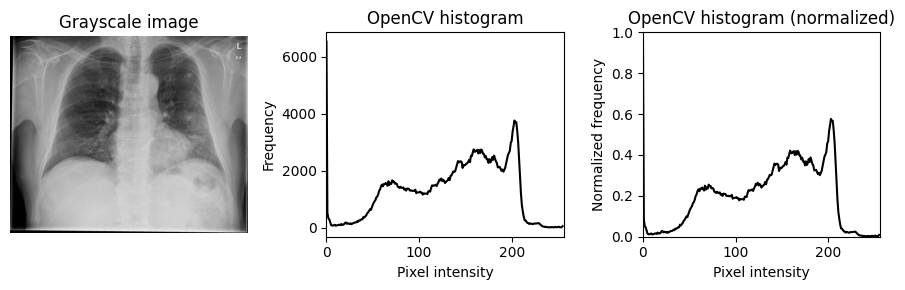

In [ ]:
# Read the image in grayscale
image = cv2.imread('/content/drive/MyDrive/PIM/Images/X-ray_1.jpeg', cv2.IMREAD_GRAYSCALE)

# Calculate the histogram using OpenCV's calcHist function
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Normalize the histogram to [0, 1]
hist_norm = hist / hist.max()  # Normalize histogram

# Create a 1x3 subplot
plt.figure(figsize=(9, 3))

# Display the grayscale image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Grayscale image')
plt.axis('off')

# Display the OpenCV histogram
plt.subplot(1, 3, 2)
plt.plot(hist, color='black')
plt.title('OpenCV histogram')
plt.xlim([0, 256])
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')
plt.gca().set_aspect(aspect='auto')

# Display the normalized OpenCV histogram
plt.subplot(1, 3, 3)
plt.plot(hist_norm, color='black')
plt.title('OpenCV histogram (normalized)')
plt.xlim([0, 256])
plt.ylim([0, 1])  # Set the y-axis limit to [0, 1] for normalization
plt.xlabel('Pixel intensity')
plt.ylabel('Normalized frequency')
plt.gca().set_aspect(aspect='auto')

plt.tight_layout()
plt.show()

#### **Histogram of a color image**

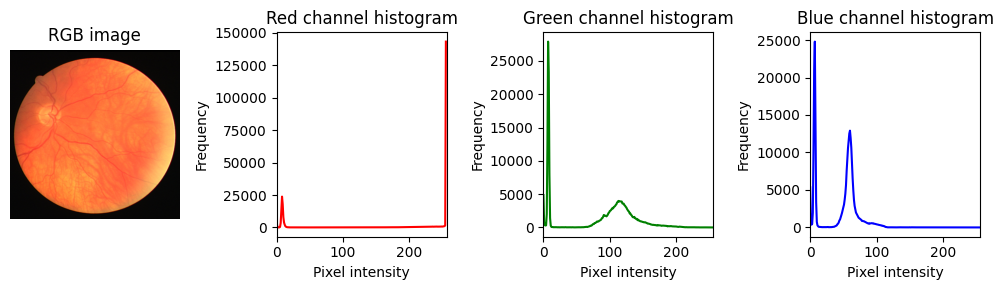

In [ ]:
# Load a color image
image = cv2.imread('/content/drive/MyDrive/PIM/Images/Retina_blood_vessel_9.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Calculate the histograms for each color channel
hist_red = cv2.calcHist([image], [0], None, [256], [0, 256]) # channel [0] (Red)
hist_green = cv2.calcHist([image], [1], None, [256], [0, 256]) # channel [1] (Green)
hist_blue = cv2.calcHist([image], [2], None, [256], [0, 256]) # channel [2] (Blue)

# Plot the image and its histograms
plt.figure(figsize=(10, 3))

# Display the original image
plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('RGB image')
plt.axis('off')

# Plot the histogram for the red channel
plt.subplot(1, 4, 2)
plt.plot(hist_red, color='red')
plt.title('Red channel histogram')
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Plot the histogram for the green channel
plt.subplot(1, 4, 3)
plt.plot(hist_green, color='green')
plt.title('Green channel histogram')
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Plot the histogram for the blue channel
plt.subplot(1, 4, 4)
plt.plot(hist_blue, color='blue')
plt.title('Blue channel histogram')
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

### 3.6. Annotating Images

Annotating medical images can be sometimes useful in:

*	enhancing the visualization of specific areas, making it easier to spot abnormalities or measure structures,

* tracking changes over time, allowing doctors to document changes in medical images over time to monitor disease progression and treatment effectiveness,

*	training and teaching medical professionals to understand and interpret images correctly,

* research and development, to train machine learning and deep learning models.

OpenCV offers a wide set of **tools for annotating medical images**, including functions for drawing lines, rectangles, circles, text, and contours.






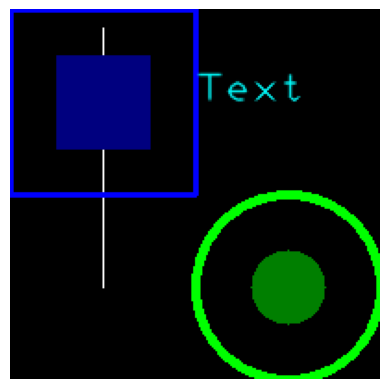

In [ ]:
# Create a black image (200x200 pixels)
image = np.zeros((200, 200, 3), dtype=np.uint8)

# Draw a line from (50, 10) to (50, 150), 1 pixel thickness
cv2.line(image, (50, 10), (50, 150), (255, 255, 255), 1)  # White line (255, 255, 255)

# Draw a rectangle with top-left corner at (0, 0) and bottom-right corner at (100, 100)
cv2.rectangle(image, (0, 0), (100, 100), (255, 0, 0), 2)  # Blue rectangle, 2 pixel thickness

# Draw a filled rectangle with top-left corner at (25, 25) and bottom-right corner at (75, 75)
cv2.rectangle(image, (25, 25), (75, 75), (127, 0, 0), -1)  # Dark blue filled (-1) rectangle

# Draw a circle with center at (150, 150) and radius 50, 3 pixel thickness
cv2.circle(image, (150, 150), 50, (0, 255, 0), 3)  # Green, non-filled circle

# Draw a filled circle with center at (150, 150) and radius 20
cv2.circle(image, (150, 150), 20, (0, 127, 0), -1)  # Darker green filled circle

# Add some text at (100, 50), with specified font, scale of 1.5, cyan color, and thickness of 1 pixel
string = 'Text'
cv2.putText(image, string, (100, 50), cv2.FONT_HERSHEY_PLAIN, 1.5, (255, 255, 0), 1, cv2.LINE_AA)
# cv2.LINE_AA enables anti-aliasing in OpenCV for smoother text or lines,
# especially when rendering on low-resolution images or diagonal text

# Display the image with all the shapes
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Shape:  (4, 2)
Coordinates:  [[ 10  10]
 [190 190]
 [190  10]
 [ 10 190]]
Shape:  (4, 1, 2)
Coordinates:  [[[ 10  10]]

 [[190 190]]

 [[190  10]]

 [[ 10 190]]]


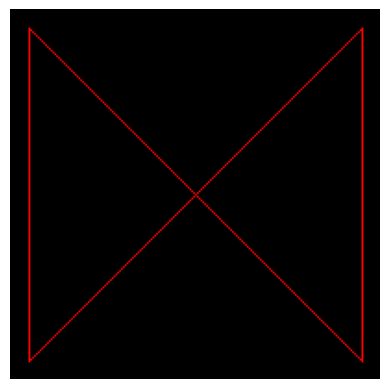

In [ ]:
# Create a black image (200x200 pixels)
image = np.zeros((200, 200, 3), dtype=np.uint8)

# Define points for a closed polygon
# Creates a NumPy array that contains the coordinates of the vertices of the polygon
# The array is defined as a 2D array with shape (4, 2), where each row represents a point (x, y)
pts = np.array([[10, 10], [190, 190], [190, 10], [10, 190]], np.int32)
print("Shape: ", pts.shape)
print("Coordinates: ", pts)

# OpenCV’s cv2.polylines function requires the input points in a specific format:
#   (number_of_points, 1, 2)
#	-	pts.reshape(...) reshapes the pts array to the format required by OpenCV’s.
#	  The reshape changes the shape of the array from (4, 2) to (4, 1, 2), where:
#	  4 is the number of points, 1 is an extra dimension needed by OpenCV, and
#	  2 corresponds to the x and y coordinates.
#   Instead of storing the points as an array of 4 rows (one row for each point) with
#   2 columns (one for x and other for y), it stores the points as a reshaped array
#   of 4 rows (one for each point) and 1 columns, but instead of storing una value
#   (x or y), stores a tupla of two values (x, y)
pts = pts.reshape((-1, 1, 2))
print("Shape: ", pts.shape)
print("Coordinates: ", pts)

# Draw a closed polygon
#	- image: is the image on which the polygon will be drawn
# - [pts]: is a list containing the reshaped points that define the polygon
#	-	isClosed=True: specifies that the polygon should be closed
#	-	color=(0, 0, 255): indicates the color of the polygon in BGR format
#	-	thickness=1: is the thickness of the lines used to draw the polygon
cv2.polylines(image, [pts], isClosed=True, color=(0, 0, 255), thickness=1)  # Red polygon (BGR)

# Display the image with all the shapes
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## References

* Chityala, Ravishankar, _Image Processing and Acquisition Using Python: Chapter 3 (Image and Its Properties)_. Chapman and Hall/CRC, 2022. 9780367531577

* Fernández Villán, Alberto, _Mastering OpenCV 4 with Python: Chapter 2 (Image Basics in OpenCV)_. Packt. 2019. 9781789344912

* González, Rafael C., _Digital image processing: Chapter 2 (Digital Image Fundamentals)_. Prentice Hall,. 2018. 9780132345637